In [2]:
from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    """
    Displays a Youtube video in a Jupyter notebook.
    
    Args:
        url (string): a link to a Youtube video.
        **kwargs: further arguments for IPython.display.YouTubeVideo
    
    Returns:
        YouTubeVideo: a video that is displayed in your notebook.
    """
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

## Convolutional neural network

![CNN](CNN.svg)

## One Convolutional Layer 

![CNN](CNN_1.svg)

## Sliding kernel and element wise multiplication

![CNN](CNN_3.png)

## Input depth = 3 , kernel should also be of depth 3

![CNN 3D](CNN_3d.svg)

## Multiple Convolution layers :

![CNN](CNN_5.png)

## In Convolution Layer :

### Filtering: The math behind the match
    1. Line up the feature and the image patch.
    2. Multiply each image pixel by the corresponding feature pixel.
    3. Add them up.
    4. Divide by the total number of pixels in the feature

In [2]:
from IPython.display import Video

Video("Filtering.mp4",width=1000, height=600)

### Pooling: Shrinking the image stack or Downsampling
    1. Pick a window size (usually 2 or 3).
    2. Pick a stride (usually 2).
    3. Walk your window across your filtered images.
    4. From each window, take the maximum value.

- We have two types of pooling :
    1. Max Pooling
    2. Average Pooling

![Pooling](MP_AP.jpg)

In [49]:
from IPython.display import Video

Video("Pooling.mp4",width=1000, height=600)

### Normalization [Relu]
    1. Keep the math from breaking by tweaking each of the values just a bit.
    2. Change everything negative to zero.


In [50]:
from IPython.display import Video

Video("Normalization.mp4",width=1000, height=600)

In [37]:
# Read links :
from IPython.display import IFrame

IFrame(src="https://brohrer.github.io/how_convolutional_neural_networks_work.html", width=800, height=800)

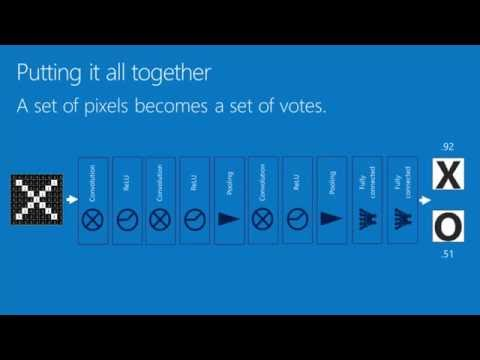

In [3]:
display_yotube_video("https://www.youtube.com/watch?v=FmpDIaiMIeA",width=800, height=800)

## Intuitive-explanation-convnets

In [32]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/', width=1500, height=600)

## Quick-intro-neural-networks

In [30]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/', width=1200, height=800)


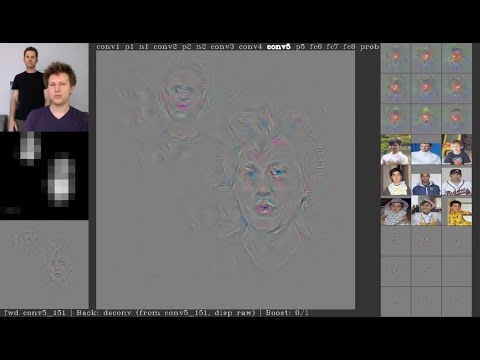

In [17]:
display_yotube_video("https://www.youtube.com/watch?v=2-Ol7ZB0MmU", width=1200, height=800)

## convolutional-neural-network

In [26]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://in.mathworks.com/solutions/deep-learning/convolutional-neural-network.html', width=1500, height=600)

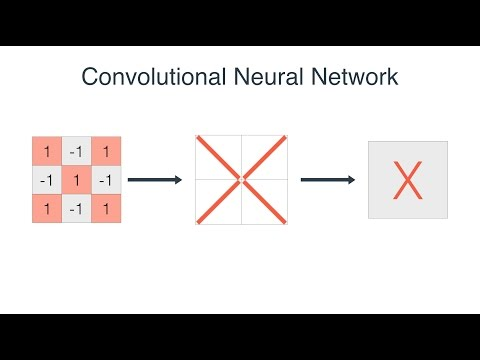

In [27]:
display_yotube_video("https://www.youtube.com/watch?v=2-Ol7ZB0MmU", width=1200, height=800)

## Padding 
1. Valid Padding (Zero padding) : Just by Convolution the the outsize is reduced .
2. Same Padding (Non-Zero Padding) : Convolution retiains the output size.


Get a Feature Map of 2x2 , without any padding . Convolution can casue a smaller feature map. With Valid Padding 

![Valid padding](Valid_padding.svg)

Same padding doesnot reduce the feature Map size :

![Image](Same_Padding.svg)

## Padding Summary :

1. Valid Padding(Zero padding) : Output size < Input Size 
2. Same Padding (non Zero padding : Output Size = Input Size

## Dimension Calculation : 
#### Convolution Output Formula 
1. Output Size = $\large\frac{W - K + 2P}{S} + 1 $
2. Output Size =  Output Height / Length 
3. W = Input Height / Length 
4. P  = Padding 
    - P = $\large\frac{K-1}{2}$
5. S = Stride 

#### Pooling Output Formula
1. Pooling Output  = $\large\frac{W}{K}$
2. W = Input Heigth/Weight
3. K = Filter = 2

## CNN Calculation : Same Padding 
![Image](CNN_6.svg)

## Same Padding 

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [ ]:
'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [ ]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
'''
STEP 3: CREATE MODEL CLASS : Same Padding
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 7 * 7, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        return out

In [ ]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''

model = CNNModel()

In [ ]:
#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

In [ ]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

In [ ]:
'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images)
            labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.cuda())
                else:
                    images = Variable(images)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss, accuracy))

## CNN Calculation : Valid Padding 
![Image](CNN_7.svg)

In [ ]:
'''
STEP 3: CREATE MODEL CLASS : Valid Padding
'''
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        return out

In [4]:
# Read links :
from IPython.display import IFrame

IFrame(src="http://setosa.io/ev/image-kernels", width=1000, height=800)